In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loans = pd.read_csv('../ml_source_files/loan_data.csv')
loans.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# 대출 가능여부 판단 - 모델을 생성
# 데이터 - 고객의 특성에 따라 dfeault 여부가 있는 데이터

# => decisiontree, randomforest를 통해서 예측모델 생성, 테스트

In [6]:
y = loans['not.fully.paid']
x = loans.drop('not.fully.paid', axis = 1)

In [7]:
x = pd.get_dummies(x)
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0,0


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=55)

# random_state 값을 다시 바꿔서 좋은 결과를 얻었다고 해도 그게 좋은 모델은 아님

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

In [10]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
preds = tree.predict(x_test)
preds

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1597
           1       0.25      0.26      0.26       319

    accuracy                           0.74      1916
   macro avg       0.55      0.55      0.55      1916
weighted avg       0.75      0.74      0.75      1916



In [13]:
from sklearn.tree import plot_tree

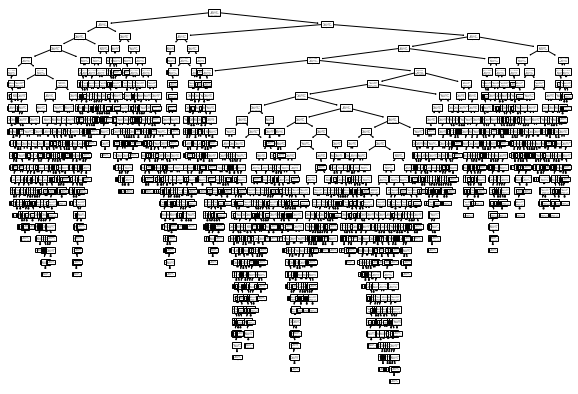

In [15]:
plt.figure(figsize = (10, 7))
plot_tree(tree)
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=100)

In [41]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
preds_rfc = rfc.predict(x_test)

In [43]:
print(classification_report(y_test, preds_rfc))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1597
           1       0.50      0.01      0.02       319

    accuracy                           0.83      1916
   macro avg       0.67      0.51      0.47      1916
weighted avg       0.78      0.83      0.76      1916



In [30]:
rfc.feature_importances_

array([0.01158744, 0.10495057, 0.11468472, 0.11213025, 0.11038563,
       0.07834782, 0.1122023 , 0.1105668 , 0.11048877, 0.05237255,
       0.0150066 , 0.00865992, 0.01157699, 0.00740387, 0.01331631,
       0.00589543, 0.00722964, 0.0046874 , 0.00850699])

In [44]:
# gridsearch

In [48]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [50, 100, 500],
         'max_depth' : [10, 20, 50],
         'min_samples_leaf' : [2, 5]}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid = params, refit = True, verbose = True, cv = 3)
grid.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50], 'min_samples_leaf': [2, 5],
                         'n_estimators': [50, 100, 500]},
             verbose=True)

In [49]:
grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 500}

In [50]:
grid.best_score_

0.8414252153484729

In [36]:
d = {'a' : [1,2,3,4],
    'b' : ['봄', '여름', '가을', '겨울'],
    'c' : [5,6,7,8]}
temp_df = pd.DataFrame(d)
temp_df

,a,b,c
0,1,봄,5
1,2,여름,6
2,3,가을,7
3,4,겨울,8


In [37]:
pd.get_dummies(temp_df)

# 문자열 칼럼의 데이터의 종류수 만큼 칼럼이 만들어진다
# 문자열 칼럼의 데이터 수의 종류가 너무 많으면 칼럼이 너무 많이 생긴다 => 머신러닝 학습에 방해가 된다
# 

,a,c,b_가을,b_겨울,b_봄,b_여름
0,1,5,0,0,1,0
1,2,6,0,0,0,1
2,3,7,1,0,0,0
3,4,8,0,1,0,0
